In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
Img_si=224
Batch_si=32

In [ ]:
tra_d=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
tra_gen=tra_d.flow_from_directory("/content/drive/MyDrive/casting_data/casting_data/train",
                                  target_size=(Img_si,Img_si),
                                  batch_size=Batch_si,
                                  class_mode="binary",
                                  subset="training"
                                  )

Found 923 images belonging to 2 classes.


In [ ]:
val_gen=tra_d.flow_from_directory("/content/drive/MyDrive/casting_data/casting_data/test",
                                  target_size=(Img_si,Img_si),
                                  batch_size=Batch_si,
                                  class_mode="binary",
                                  subset="validation"
                                  )

Found 142 images belonging to 2 classes.


In [ ]:
model=keras.Sequential([layers.Conv2D(32,(3,3),activation="relu",input_shape=(Img_si,Img_si,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [ ]:
model.fit(tra_gen,validation_data=val_gen,epochs=7,batch_size=Batch_si)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5069 - loss: 1.2006

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - accuracy: 0.5078 - loss: 1.1896 - val_accuracy: 0.5493 - val_loss: 0.6900
Epoch 2/7
29/29 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.5644 - loss: 0.6853 - val_accuracy: 0.4366 - val_loss: 0.6943
Epoch 3/7
29/29 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - accuracy: 0.5796 - loss: 0.6593 - val_accuracy: 0.7183 - val_loss: 0.5290
Epoch 4/7
29/29 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - accuracy: 0.7202 - loss: 0.5395 - val_accuracy: 0.7887 - val_loss: 0.4750
Epoch 5/7
29/29 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - accuracy: 0.7755 - loss: 0.4584 - val_accuracy: 0.8451 - val_loss: 0.3431
Epoch 6/7
29/29 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - accuracy: 0.8709 - loss: 0.3284 - val_accuracy: 0.9296 - val_loss: 0.2512
Epoch 7/7
29/29 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.9138 - loss: 0.2351 - val_accuracy: 0.9507 - val_loss: 0.1622


In [ ]:
model.save("/content/drive/MyDrive/casting_data/casting_data_model.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model=load_model("/content/drive/MyDrive/casting_data/casting_data_model.h5")

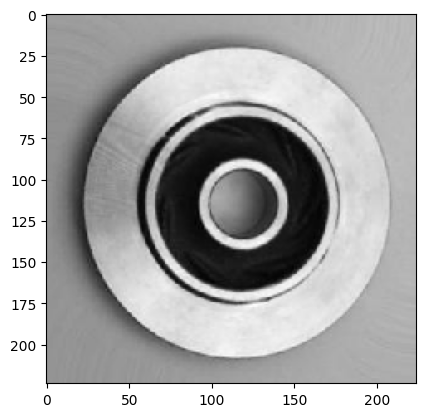

In [ ]:
test_img_path=("/content/drive/MyDrive/casting_data/casting_data/test/ok_front/cast_ok_0_1003.jpeg")
img=image.load_img(test_img_path,target_size=(Img_si,Img_si))
plt.imshow(img)
plt.axis()
plt.show()

In [ ]:
img_arr=image.img_to_array(img)
img_arr=np.expand_dims(img_arr,axis=0)
img_arr/=255

In [ ]:
prediction=model.predict(img_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


In [ ]:
prediction

array([[0.7853757]], dtype=float32)

In [ ]:
if(prediction>=0.5):
  print("Product is Not Defected")
else:
  print("product is  Defected")

Product is Not Defected


In [ ]:
tra_gen.class_indices

{'def_front': 0, 'ok_front': 1}